<font size="8">**EDA and Feature Engineering**</font>

Importing the training data file in raw CSV format

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import sklearn
link="https://raw.githubusercontent.com/gagan-iitb/CS550/main/Labs_M23/MaterialStrength_Train.csv"
Data=pd.read_csv(link)
Data

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,Material Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
795,525.0,0.0,0.0,189.0,0.0,1125.0,613.0,180,61.92
796,500.0,0.0,0.0,200.0,0.0,1125.0,613.0,90,47.22
797,500.0,0.0,0.0,200.0,0.0,1125.0,613.0,180,51.04
798,500.0,0.0,0.0,200.0,0.0,1125.0,613.0,270,55.16


In [2]:
# Check no of rows & columns in the dataset
print("Shape of the data :", Data.shape)

# See all the columns in the dataset
print("All columns are :", list(Data.columns))

Shape of the data : (800, 9)
All columns are : ['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer', 'coarse_aggregate', 'fine_aggregate ', 'age', 'Material Strength']


<font size="4">**Data Cleaning**</font><br>
Data cleaning in machine learning involves a series of essential steps to ensure that the dataset used for modeling is of high quality and suitable for analysis.These include:
1) Handling missing Data
2) Removing Duplicates and Outliers
3) Converting data types
4) Normalizing or scaling features
5) Dealing with categorical data
6) Performing feature engineering

In [3]:
# Check datatypes & count of not-null values in each field
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   cement              800 non-null    float64
 1   blast_furnace_slag  800 non-null    float64
 2   fly_ash             800 non-null    float64
 3   water               800 non-null    float64
 4   superplasticizer    800 non-null    float64
 5   coarse_aggregate    800 non-null    float64
 6   fine_aggregate      800 non-null    float64
 7   age                 800 non-null    int64  
 8   Material Strength   800 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 56.4 KB


We can see here that there are no missing values as the values are non-null in all features.

<font size="4">Visualizing through box plot and searching for outliers</font>


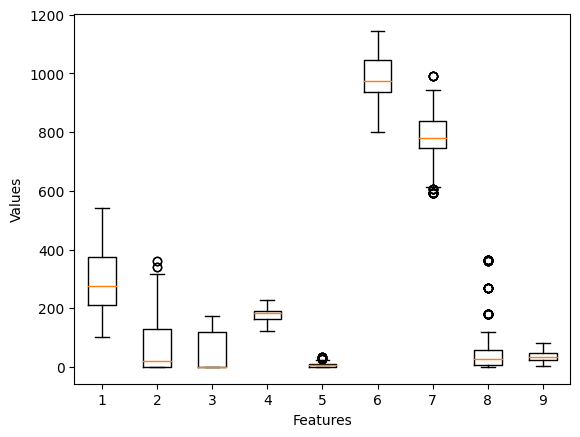

In [4]:
plt.boxplot(Data)
plt.xlabel("Features")
plt.ylabel("Values")
# Show the plot
plt.show()

<font size="4">**Removing Duplicates and Outliers**</font><br>
Eliminating duplicate records enhances data quality by ensuring uniqueness and accuracy, reduces memory and storage requirements, and improves model performance. Meanwhile, removing outliers leads to more robust models, improved data distribution, and enhanced visualization, reducing overfitting risks and supporting valid statistical analyses.

In [5]:
Data=Data.drop_duplicates()
Q1 = Data.quantile(0.25)
Q3 = Data.quantile(0.75)
I_QR = Q3 - Q1

# Define a threshold for outliers
threshold = 1.5
Data = Data[~((Data < (Q1 - threshold * I_QR)) | (Data > (Q3 + threshold * I_QR))).any(axis=1)]
Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 682 entries, 0 to 799
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   cement              682 non-null    float64
 1   blast_furnace_slag  682 non-null    float64
 2   fly_ash             682 non-null    float64
 3   water               682 non-null    float64
 4   superplasticizer    682 non-null    float64
 5   coarse_aggregate    682 non-null    float64
 6   fine_aggregate      682 non-null    float64
 7   age                 682 non-null    int64  
 8   Material Strength   682 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 53.3 KB


<font size="4">There are no Categorical attributes also in our ml model as seen from the above summary.</font>

In [6]:
#To calculate statistics of predictors and target
Data.describe()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,Material Strength
count,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000
mean,280.514516,61.964370,56.083578,177.940616,5.467595,992.893109,786.663930,33.627566,34.787141
std,100.840021,84.135108,63.076422,18.666807,5.300286,70.305159,70.426284,32.103069,17.516264
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,611.800000,1.000000,2.330000
25%,202.000000,0.000000,0.000000,162.000000,0.000000,944.700000,750.000000,7.000000,21.485000
50%,251.800000,0.000000,0.000000,181.700000,5.700000,998.100000,781.500000,28.000000,33.085000
75%,350.000000,122.600000,118.600000,192.000000,9.900000,1051.725000,839.200000,56.000000,46.670000
max,540.000000,316.100000,174.700000,228.000000,22.000000,1145.000000,945.000000,120.000000,82.600000


After Removing Duplicates and Outliers 

Text(0, 0.5, 'Values')

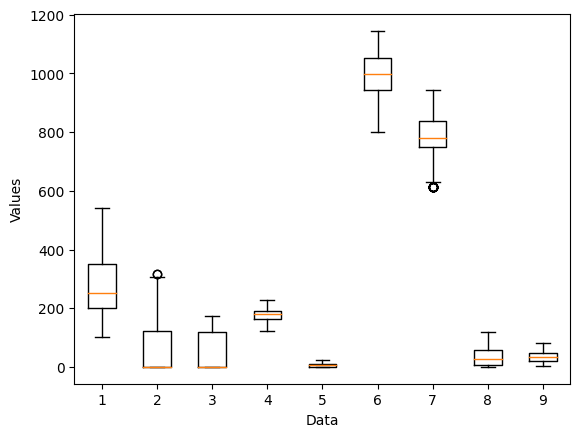

In [7]:
plt.boxplot(Data)
plt.xlabel("Data")
plt.ylabel("Values")

<font size="4">Since all the feature data types are of same king i.e. float and int , so there is no need for data type conversion.</font>

<font size="4">**Splitting the features into training and testing sets and Scaling them.**</font>

In [8]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression  # Import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
X = Data.drop(["Material Strength"], axis=1)
y = Data['Material Strength']

# Split the data into training and testing sets
X_training, X_testing, y_training, y_testing = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (z-score scaling)
scaler = StandardScaler()
X=scaler.fit_transform(X)
X_training_scaled = scaler.fit_transform(X_training)
X_testing_scaled = scaler.transform(X_testing)

<font size="4">There is no Categorical attribute also in our ml model.</font>

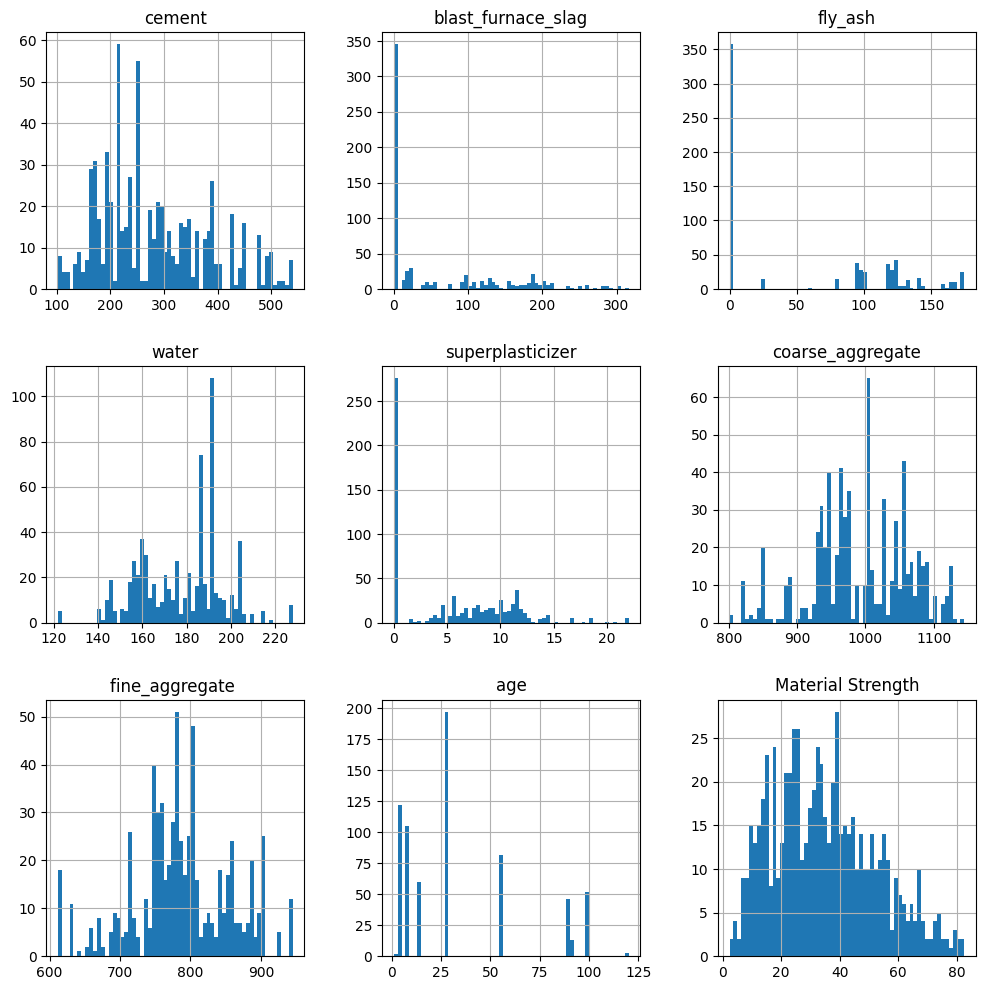

In [9]:
from matplotlib import pyplot as plt
Data.hist(bins=60, figsize=(12,12))
plt.show()

Cement: Measured in kilograms (kg) or metric tons (tonnes).
Water: Measured in liters (L) or cubic meters (m³) when determining the amount of water added to the mix

Superplasticizer: Measured in liters (L) or kilograms (kg) depending on the type of superplasticizer uet.

Fly Ash: Measured in kilograms (kg) or metric tons (t. Fly ash is typically used as a supplementary cementitious material and is added in proportion to the cementnent.

Blast Furnace Slag: Measured in kilograms (kg) or metric tons (tonnes). Similar to fly ash, it is used as a supplementary cementitious material and added based on the cementcntent.

Coarse Aggregate: Measured in cubic meters (m³) or cubic feet (ft³) when determining the volume of coarse aggregate to be used i(tonnes).

Fine Aggregate (Sand): Measured in cubic meters (m³) or cubic feet (ft³) when determining the volume of fine aggregate (sand)ns (tonnes)
Day 1-365

Concrete compressive strength – MPa(mega pascals)hysical units.

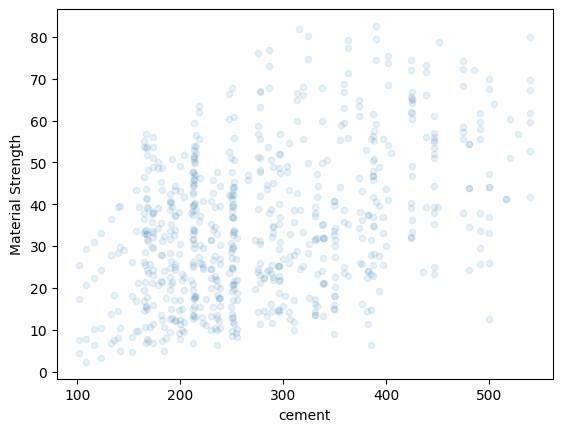

In [10]:
#Visualizing using scatter plot
Data.plot(kind="scatter", y="Material Strength", x="cement", alpha=0.1)
plt.show()

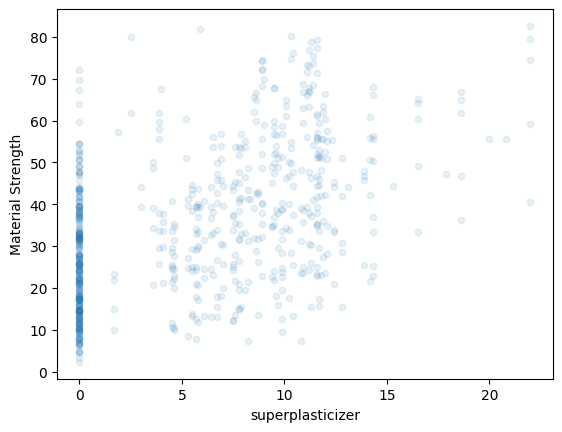

In [11]:
Data.plot(kind="scatter", y="Material Strength", x="superplasticizer", alpha=0.1)
plt.show()

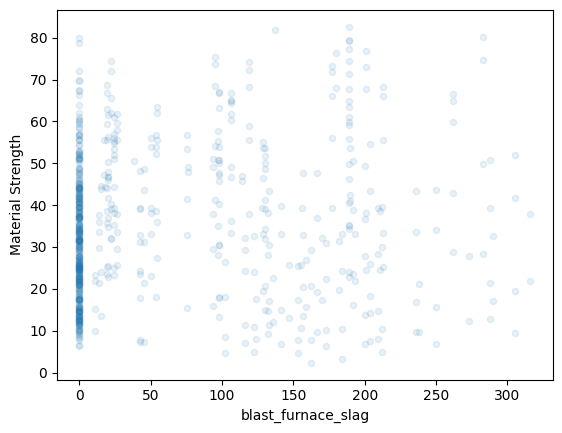

In [12]:
Data.plot(kind="scatter", y="Material Strength", x="blast_furnace_slag", alpha=0.1)
plt.show()

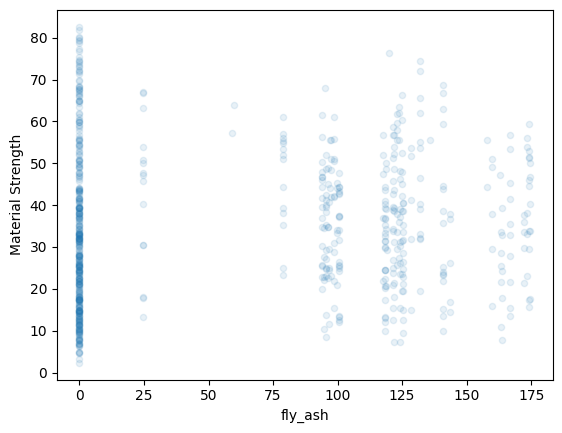

In [13]:
Data.plot(kind="scatter", y="Material Strength", x="fly_ash", alpha=0.1)
plt.show()

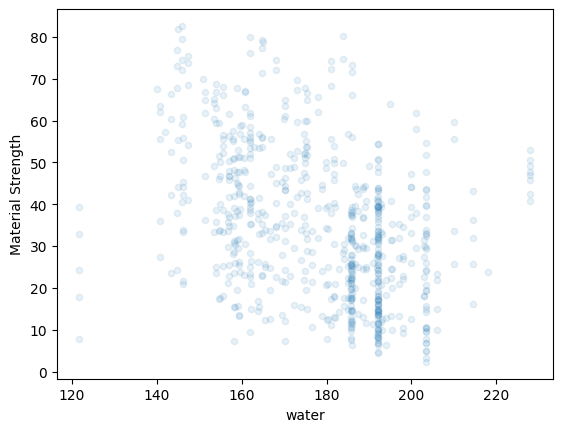

In [14]:
Data.plot(kind="scatter", y="Material Strength", x="water", alpha=0.1)
plt.show()

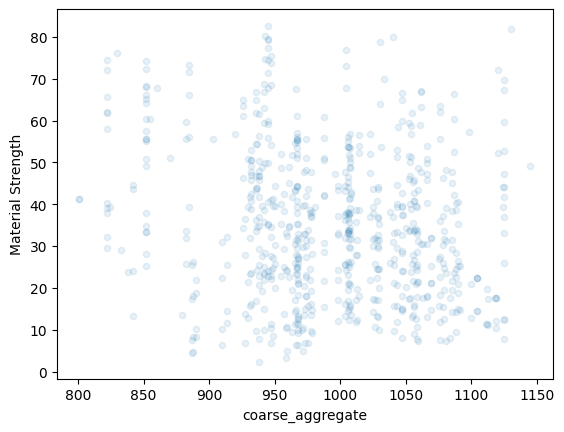

In [15]:
Data.plot(kind="scatter", y="Material Strength", x="coarse_aggregate", alpha=0.1)
plt.show()

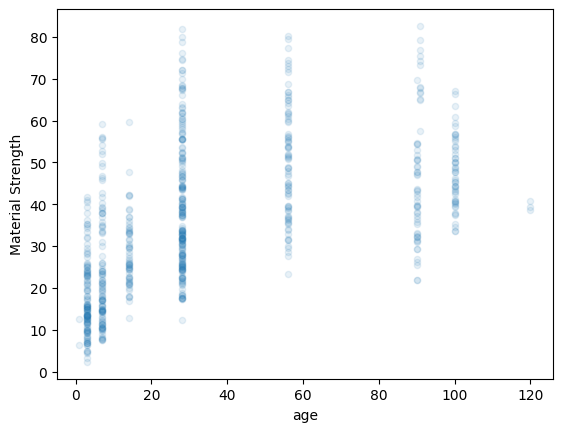

In [16]:
Data.plot(kind="scatter", y="Material Strength", x="age", alpha=0.1)
plt.show()

In [17]:
# Corerelation
corr_matrix = Data.corr()

In [18]:
corr_matrix["Material Strength"].sort_values(ascending=False)

Material Strength     1.000000
age                   0.555234
superplasticizer      0.507562
cement                0.438638
blast_furnace_slag    0.097621
fly_ash               0.076789
coarse_aggregate     -0.177931
fine_aggregate       -0.217973
water                -0.384900
Name: Material Strength, dtype: float64

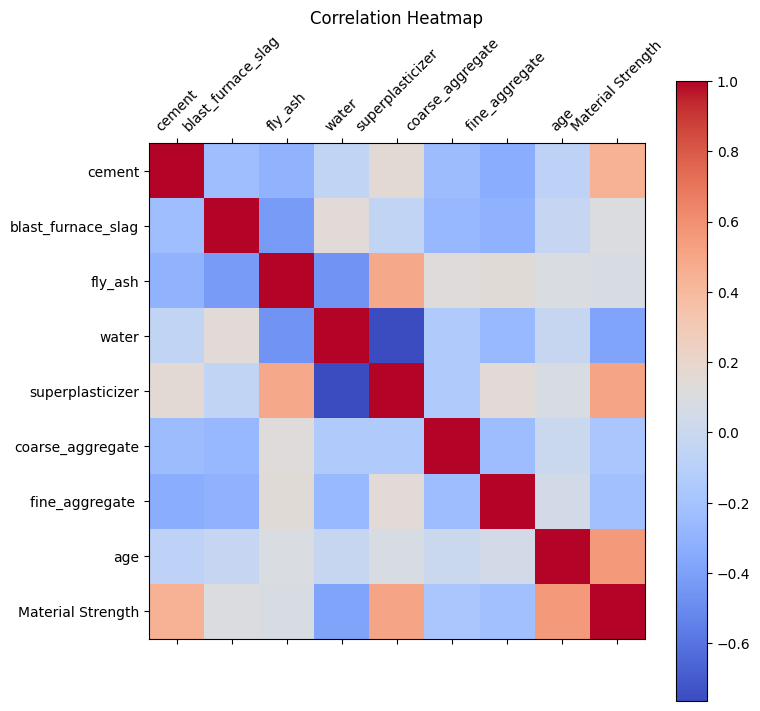

In [19]:
correlation_matrix = Data.corr()
plt.figure(figsize=(8, 8))
plt.matshow(correlation_matrix, cmap='coolwarm', fignum=1)
plt.colorbar()
plt.xticks(range(len(Data.columns)), Data.columns, rotation=45)
plt.yticks(range(len(Data.columns)), Data.columns)
plt.title('Correlation Heatmap')
plt.show()

<font size="3">The above correlation heat map indicates strong positive correlation between material strength-superplasticize , superplasticizer-cement , age-material strength , fly_ash-superplasticizer, fine_aggregate-superplasticizer, age-water etc.Negative correlation between superplasticizer-water , water-fine_agregrate , material strength-water ,  blast_furnance_slag-fineaggregate.</font>

<font size="4">**Making new Features(Feature Engineering)**</font>

We are our new model Datanew by adding a feature "Cement Water Ratio" and removing cement and water features.

In [20]:
# We can generate more feature by logically combining one or more features
Datanew=Data.copy()
Datanew["Cement Water Ratio"] = Data["cement"]/Data["water"]
Datanew=Datanew.drop(["cement"],axis=1)
Datanew=Datanew.drop(["water"],axis=1)
Datanew

,blast_furnace_slag,fly_ash,superplasticizer,coarse_aggregate,fine_aggregate,age,Material Strength,Cement Water Ratio
0,0.0,0.0,2.5,1040.0,676.0,28,79.99,3.333333
1,0.0,0.0,2.5,1055.0,676.0,28,61.89,3.333333
5,114.0,0.0,0.0,932.0,670.0,90,47.03,1.166667
8,114.0,0.0,0.0,932.0,670.0,28,45.85,1.166667
10,132.4,0.0,0.0,978.4,825.5,90,38.07,1.034375
...,...,...,...,...,...,...,...,...
789,0.0,0.0,0.0,1047.0,806.0,28,32.72,1.817708
790,0.0,0.0,0.0,1047.0,806.0,90,39.49,1.817708
793,0.0,0.0,0.0,974.0,817.0,14,18.13,1.487685
796,0.0,0.0,0.0,1125.0,613.0,90,47.22,2.500000


Scaling and splitting into training and testing sets For our new ml model

In [21]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression  # Import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
X = Datanew.drop(["Material Strength"], axis=1)
y = Data['Material Strength']

# Split the data into training and testing sets
Xnew_training, Xnew_testing, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (z-score scaling)
scaler = StandardScaler()
X=scaler.fit_transform(X)
Xnew_training_scaled = scaler.fit_transform(Xnew_training)
Xnew_testing_scaled = scaler.transform(Xnew_testing)

In [22]:
# Again calculate correlation for new features.
corr_matrix = Datanew.corr()
corr_matrix["Material Strength"].sort_values(ascending=False)

Material Strength     1.000000
age                   0.555234
Cement Water Ratio    0.532283
superplasticizer      0.507562
blast_furnace_slag    0.097621
fly_ash               0.076789
coarse_aggregate     -0.177931
fine_aggregate       -0.217973
Name: Material Strength, dtype: float64

<font size="3">**As we can see the correlation increased when we introduced new feature .
Our new feature Water-Cement Ratio (W/C Ratio) is strongly correlated to material strength positively.**</font>

<font size="8">**Exact Solution**</font>

The Normal Equation is a mathematical approach used in linear regression to find the optimal coefficients (parameters) for a linear model that minimizes the mean squared error (MSE) between the predicted values and the actual target values. It provides a closed-form solution for linear regression problems.<br>
$y = \theta_0+\theta_1{x_1}+\theta_2{x_2}+ .....+\theta_n{x_n}$ <br>
y is the response variable <br>
$\theta_0$ is the intercept $\theta_1 ..... \theta_n $ are coefficients .
,
�
�
x 
1
​
 ,x 
2
​
 ,…,x 
n
​
 .

We will first Apply Normal Equation on the original Data matrix .

In [23]:
X=Data.drop(['Material Strength'],axis=1) # feature data  matrix
Y=Data['Material Strength']  # Label vector

In [24]:
Data_transpose=X.T  # Transpose of Feature Data matrix
Data_product_Datatranspose=np.dot(Data_transpose , X) # Product of transposed Feature data matrix and feature data matrix
Inverse_matrix=np.linalg.inv(Data_product_Datatranspose) # Inverese of above Product
Inverse_product=np.dot(Inverse_matrix , Data_transpose) # Inverse product with transposed feature data matrix
Parameter_matrix=np.dot(Inverse_product , Y) #Above product with Label Vector
Parameter_matrix # Parameter matrix for original data matrix

array([ 0.10410205,  0.07882673,  0.05522648, -0.14718301,  0.59844849,
        0.01270024, -0.00336163,  0.31365249])

In [25]:
Predicted_materialStrength=np.dot(X,Parameter_matrix)
squared_diff = (Predicted_materialStrength - Y) ** 2
mean_squared_diff = squared_diff.mean()

# Calculate the RMSE by taking the square root of the mean squared difference
rmse = np.sqrt(mean_squared_diff)

print("Root Mean Square Error (RMSE):", rmse)

Root Mean Square Error (RMSE): 8.218707087991975


Now we will apply normal equation on our new Data matrix Datanew.

In [26]:
X=Datanew.drop(['Material Strength'],axis=1) #new feature data matrix
Y=Datanew['Material Strength']  # Label vector

In [27]:
Data_transpose=X.T  # Transpose of New Data matrix
Data_product_Datatranspose=np.dot(Data_transpose , X) # Product of transposed New data matrix and New data matrix
Inverse_matrix=np.linalg.inv(Data_product_Datatranspose) # Inverese of above Product
Inverse_product=np.dot(Inverse_matrix , Data_transpose) # Inverse product with transposed new data matrix
NewParameter_matrix=np.dot(Inverse_product , Y) #Above product with Label Vector
NewParameter_matrix # Parameter matrix for new data matrix

array([ 6.40292670e-02,  4.97107285e-02,  6.13709600e-01,  2.66893848e-03,
       -1.93856545e-02,  3.13072613e-01,  1.67455355e+01])

In [28]:
NewPredicted_materialStrength=np.dot(X,NewParameter_matrix)
squared_diff = (NewPredicted_materialStrength - Y) ** 2
mean_squared_diff = squared_diff.mean()

# Calculate the RMSE by taking the square root of the mean squared difference
rmse = np.sqrt(mean_squared_diff)

print(" New Root Mean Square Error (RMSE):", rmse)

 New Root Mean Square Error (RMSE): 8.163901779817314


As we can see from above that the root mean sqaure decreased in our new data matrix .

In NumPy, we can compute the pseudo-inverse (also known as the Moore-Penrose pseudo-inverse) of a matrix using the numpy.linalg.pinv() function.<br>
Parameter variable $\theta = X^{+}y$

In [29]:
Y=Data['Material Strength'] # label vector
X=Data.drop(['Material Strength'],axis=1) # feature data  matrix
Pseudoinverse_matrix=np.linalg.pinv(X)
Parameter_Matrix=np.dot(Pseudoinverse_matrix,Y)

In [30]:
Parameter_Matrix

array([ 0.10410205,  0.07882673,  0.05522648, -0.14718301,  0.59844849,
        0.01270024, -0.00336163,  0.31365249])

In [31]:
Predicted_materialStrength=np.dot(X,Parameter_matrix)
squared_diff = (Predicted_materialStrength - Y) ** 2
mean_squared_diff = squared_diff.mean()

# Calculate the RMSE by taking the square root of the mean squared difference
rmse = np.sqrt(mean_squared_diff)

print("Root Mean Square Error (RMSE):", rmse)

Root Mean Square Error (RMSE): 8.218707087991975


Pseudo inverse for our new Data matrix datanew

In [32]:
Y=Datanew['Material Strength'] # label vector
X=Datanew.drop(['Material Strength'],axis=1) # feature data  matrix
Pseudoinverse_matrix=np.linalg.pinv(X)
NewParameter_Matrix=np.dot(Pseudoinverse_matrix,Y)

In [33]:
NewParameter_Matrix

array([ 6.40292670e-02,  4.97107285e-02,  6.13709600e-01,  2.66893848e-03,
       -1.93856545e-02,  3.13072613e-01,  1.67455355e+01])

In [34]:
NewPredicted_materialStrength=np.dot(X,NewParameter_matrix)
squared_diff = (NewPredicted_materialStrength - Y) ** 2
mean_squared_diff = squared_diff.mean()

# Calculate the RMSE by taking the square root of the mean squared difference
rmse = np.sqrt(mean_squared_diff)

print(" New Root Mean Square Error (RMSE):", rmse)

 New Root Mean Square Error (RMSE): 8.163901779817314


<font size="4">**We can see that Normal Equation gave the same Parameter matrix as psuedo inverse.**</font>

<font size="8">**Statistical Analysis**</font>

<font size="3">OLS (Ordinary Least Squares) regression is a statistical method used in machine learning and econometrics for modeling the relationship between a dependent variable (target) and one or more independent variables (predictors) by finding the best-fitting linear equation. </font>

<font size="3">We will use the scaled training and testing steps created before in OLS</font>

In [35]:
# Create and fit the OLS regression model
model = LinearRegression()
model.fit(X_training_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_testing_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
X= sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

                            OLS Regression Results                            
Dep. Variable:      Material Strength   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     346.8
Date:                Tue, 05 Sep 2023   Prob (F-statistic):          1.40e-218
Time:                        18:47:36   Log-Likelihood:                -2399.4
No. Observations:                 682   AIC:                             4815.
Df Residuals:                     674   BIC:                             4851.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -9.7628     11

Mean Squared Error: 57.41623809552613
R-squared: 0.8079676272425451

We know that if the p-value of a feature is less than .05 then it is significant.
From the above summary we can see that  coarse_aggregate is insignificant feature only.

In [36]:
prediction_intervals = model.get_prediction()
predicted_values = prediction_intervals.predicted_mean
confidence_intervals = prediction_intervals.conf_int()
for i, (predicted_value, (lower_bound, upper_bound)) in enumerate(zip(predicted_values, confidence_intervals)):
    print(f"Prediction {i + 1}: {predicted_value:.4f} (CI: {lower_bound:.4f}, {upper_bound:.4f})")

Prediction 1: 56.2000 (CI: 53.7412, 58.6588)
Prediction 2: 56.3050 (CI: 53.7716, 58.8383)
Prediction 3: 43.6546 (CI: 41.0885, 46.2206)
Prediction 4: 24.2038 (CI: 21.8550, 26.5526)
Prediction 5: 40.7304 (CI: 39.0834, 42.3774)
Prediction 6: 21.2797 (CI: 20.0893, 22.4701)
Prediction 7: 43.0714 (CI: 40.5938, 45.5490)
Prediction 8: 24.4954 (CI: 22.0218, 26.9690)
Prediction 9: 44.5292 (CI: 41.5085, 47.5500)
Prediction 10: 41.4142 (CI: 39.2030, 43.6253)
Prediction 11: 21.9635 (CI: 20.0896, 23.8373)
Prediction 12: 14.1204 (CI: 12.1767, 16.0641)
Prediction 13: 44.2377 (CI: 41.4042, 47.0711)
Prediction 14: 18.7287 (CI: 17.3415, 20.1158)
Prediction 15: 43.9461 (CI: 41.2662, 46.6260)
Prediction 16: 15.3753 (CI: 13.4508, 17.2998)
Prediction 17: 14.6915 (CI: 13.4120, 15.9711)
Prediction 18: 13.4366 (CI: 12.1263, 14.7470)
Prediction 19: 14.0357 (CI: 12.6404, 15.4309)
Prediction 20: 23.6207 (CI: 21.3708, 25.8706)
Prediction 21: 53.3995 (CI: 49.1053, 57.6937)
Prediction 22: 43.9062 (CI: 42.3608, 45.451

<font size ="3">OLS regression for new Data Matrix Data New</font>

In [37]:
model = LinearRegression()
model.fit(Xnew_training_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(Xnew_testing_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
X= sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      Material Strength   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     346.8
Date:                Tue, 05 Sep 2023   Prob (F-statistic):          1.40e-218
Time:                        18:47:36   Log-Likelihood:                -2399.4
No. Observations:                 682   AIC:                             4815.
Df Residuals:                     674   BIC:                             4851.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -9.7628     11

In the DataNew model after OLS regression we got that p value of coarse_aggregate is greater than .5 so it is a insignificant feature .

In [38]:
prediction_intervals = model.get_prediction()
predicted_values = prediction_intervals.predicted_mean
confidence_intervals = prediction_intervals.conf_int()
for i, (predicted_value, (lower_bound, upper_bound)) in enumerate(zip(predicted_values, confidence_intervals)):
    print(f"Prediction {i + 1}: {predicted_value:.4f} (CI: {lower_bound:.4f}, {upper_bound:.4f})")

Prediction 1: 56.2000 (CI: 53.7412, 58.6588)
Prediction 2: 56.3050 (CI: 53.7716, 58.8383)
Prediction 3: 43.6546 (CI: 41.0885, 46.2206)
Prediction 4: 24.2038 (CI: 21.8550, 26.5526)
Prediction 5: 40.7304 (CI: 39.0834, 42.3774)
Prediction 6: 21.2797 (CI: 20.0893, 22.4701)
Prediction 7: 43.0714 (CI: 40.5938, 45.5490)
Prediction 8: 24.4954 (CI: 22.0218, 26.9690)
Prediction 9: 44.5292 (CI: 41.5085, 47.5500)
Prediction 10: 41.4142 (CI: 39.2030, 43.6253)
Prediction 11: 21.9635 (CI: 20.0896, 23.8373)
Prediction 12: 14.1204 (CI: 12.1767, 16.0641)
Prediction 13: 44.2377 (CI: 41.4042, 47.0711)
Prediction 14: 18.7287 (CI: 17.3415, 20.1158)
Prediction 15: 43.9461 (CI: 41.2662, 46.6260)
Prediction 16: 15.3753 (CI: 13.4508, 17.2998)
Prediction 17: 14.6915 (CI: 13.4120, 15.9711)
Prediction 18: 13.4366 (CI: 12.1263, 14.7470)
Prediction 19: 14.0357 (CI: 12.6404, 15.4309)
Prediction 20: 23.6207 (CI: 21.3708, 25.8706)
Prediction 21: 53.3995 (CI: 49.1053, 57.6937)
Prediction 22: 43.9062 (CI: 42.3608, 45.451

<font size="8">**Gradient Descent**</font>

X and y are the feature matrix and target variable, respectively.
theta is the initial guess for the model parameter
l_rate is the step size for gradient descent.
no_iterations is the maximum number of iterations.
conv_threshold is the threshold for detecting convergence.

Optimal Theta: [32.28639793  2.38801207  0.50216584  5.63284132 -1.16257909 -3.14406419
  9.29751024  7.07388747]
Root Mean Squared Error: 6.187562771714257


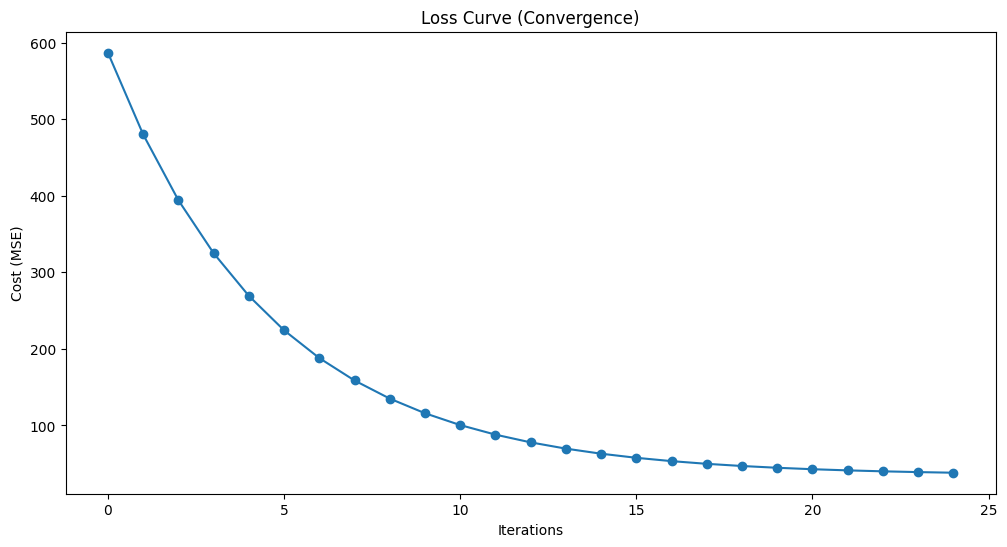

In [67]:
X = Datanew.drop(["Material Strength"], axis=1)
y = Data['Material Strength']
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X_normalized = (X - X_mean) / X_std

X_a = np.c_[np.ones((X_normalized.shape[0], 1)), X_normalized]

# Define the cost function (mean squared error)
def compute_cost(theta, X, y):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

# Gradient Descent function with convergence criterion
def gradient_descent(X, y, theta, l_rate, no_iterations, conv_threshold):
    m = len(y)
    cost_history = []

    for iteration in range(no_iterations):
        gradient = (1 / m) * X.T.dot(X.dot(theta) - y)
        theta -= l_rate * gradient
        cost = compute_cost(theta, X, y)
        cost_history.append(cost)

        # Check for convergence
        if iteration > 0 and abs(cost_history[-1] - cost_history[-2]) < conv_threshold:
            break

    return theta, cost_history

# Set initial parameters
initial_theta = np.random.randn(X_a.shape[1])  # Random initial values for coefficients (including intercept)
l_rate = .1
no_iterations = 1000
conv_threshold = 1 # Convergence criterion: stop if change in cost is less than this threshold

# Perform gradient descent
theta, cost_history = gradient_descent(X_a, y, initial_theta, l_rate, no_iterations, conv_threshold)

# Plot the loss (cost) curve
plt.figure(figsize=(12, 6))
plt.plot(range(len(cost_history)), cost_history, marker='o', linestyle='-')
plt.xlabel('Iterations')
plt.ylabel('Cost (MSE)')
plt.title('Loss Curve (Convergence)')
print("Optimal Theta:", theta)
rmse = np.sqrt(cost_history[-1])
print("Root Mean Squared Error:", rmse)
plt.show()

<font size="8">**KNN**</font>

In [68]:
from sklearn.neighbors import KNeighborsRegressor
k_values = [1, 3, 4 , 6]  # You can add more values to this list
for k in k_values:
    # Create a KNN regressor with the current K value
    knn = KNeighborsRegressor(n_neighbors=k)
    
    # Fit the model to the training data
    knn.fit(Xnew_training_scaled, y_train)
    
    # Make predictions on the test data
    y_pred = knn.predict(Xnew_testing_scaled)
    
    # Calculate and print evaluation metrics for the current K value
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    print(f"K={k}, Root Mean Squared Error: {rmse:.2f}, R-squared: {r2:.2f}")

K=1, Root Mean Squared Error: 10.55, R-squared: 0.65
K=3, Root Mean Squared Error: 8.35, R-squared: 0.78
K=4, Root Mean Squared Error: 8.40, R-squared: 0.78
K=6, Root Mean Squared Error: 8.20, R-squared: 0.79


<font size="3">**Observation**</font><br>
As we change the value of K  ythe model's behavior changes. 
Smaller K values (eg  K=3) lead to more flexible and noisy model  which may lead to overfitting.
Larger value ) result in smoother decision boundaries and tend to generalize better. However, they might underfit if chosen excessively lar.r...

<font size="3">**Validation Accuracy as compared to Parametric approach**</font><br>
Parametric models make assumptions about the functional form of the data, whereas KNN is non-parametric and makes no assumptions about the data distribution.
Parametric models may work well when the data conforms to their assumptions, while KNN can be more flexible when the underlying distribution is complex or non-linear.

<font size="3">**Pros:**</font><br>
It is Simple to implement and understand.<br>
When decision boundaries are non-linear or complex it works well.<br>
Assumptions are not  about the data distribution.<br>
<font size="3">**Cons:**</font><br>
It Computationally expensive for large datasets, as it requires calculating distances between data points.<br>
It is Sensitive to the choice of K.<br>
It Doesn't handle irrelevant or redundant features well.<br>
Affected by outliers.

<font size="8">**GLM**</font>

<font size="4">**Gaussian distribution**</font>

For the Gaussian distribution, the link function is the identity function, which means that the linear predictor is directly related to the mean of the response variable:
g(μ)=μ
In this case, the linear predictor is the mean itself, and there is a linear relationship between the predictor variables and the response variable.

We have used Gaussian ditsribution as we have a Continuous Response Variable.
Beacuse distribution of response variable is over a wide range of real-number values.

In [69]:
y_train_ndarray = y_train.values.reshape(-1,1)
y_test_ndarray = y_test.values.reshape(-1,1)
model = sm.GLM(y_train_ndarray, sm.add_constant(Xnew_training_scaled), family=sm.families.Gaussian()).fit()
y_pred = model.predict(sm.add_constant(Xnew_testing_scaled))
mse = mean_squared_error(y_test_ndarray, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse:.2f}, R-squared: {r2:.2f}")

Root Mean Squared Error: 8.45, R-squared: 0.78


<font size="4">**Poisson distribution**</font>

The link function associated with the Poisson distribution is the "log" or "logarithmic" link function. The log link function relates the linear predictor (resulting from a linear combination of predictor variables) to the mean of the Poisson-distributed response variable. The link function is defined as:
g(μ)=ln(μ)
g(μ) is the linear predictor.
μ is the mean of the Poisson-distributed response variable.

In [70]:
y_train_ndarray = y_train.values.reshape(-1,1)
y_test_ndarray = y_test.values.reshape(-1,1)
model = sm.GLM(y_train_ndarray, sm.add_constant(Xnew_training_scaled), family=sm.families.Poisson()).fit()
y_pred = model.predict(sm.add_constant(Xnew_testing_scaled))
mse = mean_squared_error(y_test_ndarray, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)    
print(f"Root Mean Squared Error: {rmse:.2f}, R-squared: {r2:.2f}")

Root Mean Squared Error: 10.11, R-squared: 0.68


<font size="8">**Test Output**</font>

Normal Equation : Root Mean Square Error (RMSE): 8.163901779817314 <br>
Gradient Descent : Root Mean Squared Error (RMSE): < 8 <br>
KNN : Root Mean Squared Error (RMSE): 8.20 <br>
Gaussian Model : Root Mean Squared Error (RMSE): 8.45 <br>
Poisson Model : Root Mean Squared Error (RMSE): 10.11 <br>

<font size="4">**Comparing from the accuracies of above models we noticed that the best suitable model is the Gradient Descent .
Gradient Descent Model MSE is the lowest of all.**</font>

We will apply Gradient Descent model to the testing Data . This model includes a new feature "cement water ratio" and we deleted the "cement" feature and "water" feature .

In [71]:
link="https://raw.githubusercontent.com/gagan-iitb/CS550/main/Labs_M23/MaterialStrength_test.csv"
Test_frame=pd.read_csv(link)
Test_frame=Test_frame.drop(['material_strength'],axis=1)
Test_frame["cement water Ratio"]=Test_frame['cement']/Test_frame['water']

In [72]:
Test_frame=Test_frame.drop(['cement'],axis=1)
Test_frame=Test_frame.drop(['water'],axis=1)
Test_frame

,blast_furnace_slag,fly_ash,superplasticizer,coarse_aggregate,fine_aggregate,age,cement water Ratio
0,0.0,0.0,0.0,1111.0,784.0,7,1.362162
1,0.0,0.0,0.0,1111.0,784.0,28,1.362162
2,0.0,0.0,0.0,1060.0,754.0,28,1.832432
3,0.0,0.0,0.0,940.0,758.0,3,2.046875
4,0.0,0.0,0.0,940.0,758.0,28,2.046875
...,...,...,...,...,...,...,...
225,116.0,90.3,8.9,870.1,768.3,28,1.538976
226,0.0,115.6,10.4,817.9,813.4,28,1.643878
227,139.4,108.6,6.1,892.4,780.0,28,0.770628
228,186.7,0.0,11.3,989.6,788.9,28,0.906036


Now applying the Gradient Descent Model on Test Test_frame

In [73]:
print("Optimal Theta:", theta)

Optimal Theta: [32.28639793  2.38801207  0.50216584  5.63284132 -1.16257909 -3.14406419
  9.29751024  7.07388747]


In [74]:
X=Test_frame.copy()
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X_normalized = (X - X_mean) / X_std
X_a = np.c_[np.ones((X_normalized.shape[0], 1)), X_normalized]

In [75]:
X= np.c_[np.ones((X_normalized.shape[0], 1)), X_normalized] 

In [76]:
Predicted_strength=np.dot(X,theta)

In [77]:
Predicted_strength

array([  8.39158373,  14.57383335,  22.69037444,  19.64840679,
        27.00822777,  45.26058381,  20.3472458 ,  26.52949543,
         8.29841615,  14.57383335,  10.65098976,  16.83323939,
        35.08559542,  61.58095096, 114.57166203,  32.88229853,
        34.05986988,  36.12061976,  40.24211951,  58.49447555,
       111.48518662,  14.59162385,  18.7131236 ,  63.46083517,
        16.67774019,  27.89446359,  27.17410903,  34.57320363,
        40.75545326,  36.74768129,  45.6064138 ,  32.45832792,
        23.59999806,  44.4634689 ,  62.81471294,  32.91630546,
        33.02530391,  35.18362453,  38.39140532,  27.66615138,
        39.58296573,  36.47270877,  27.81032213,  30.75288714,
        37.85863582,  33.82551211,  41.38733833,  37.15316682,
        29.71573542,  29.09287436,  34.53683478,  35.3620151 ,
        28.11027059,  30.98793597,  39.43852974,  40.43351462,
        40.71276778,  25.92661642,  39.56436552,  27.92895001,
        37.18523503,  38.46845835,  27.52329223,  31.27

In [78]:
pd.DataFrame(Predicted_strength).to_csv('12140590_Dhruv_Asg1.csv',header=False ,index=False)

The References Used are: <br>
Hand on Machine Learning Book <br>
Geeks for Geeks <br>
scikit-learn.org/stable/ <br>

In [1]:
import numpy as np
import pandas as pd
file_path = 'concrete_data_Solution.csv'
Test_f = pd.read_csv(file_path,header=None)
Actual=Test_f.values.ravel()
Actual
Pred=pd.read_csv('12140590_Dhruv_Asg1.csv',header=None)
Predicted=Pred.values.ravel()

In [2]:
mse = np.mean((Actual - Predicted) ** 2)

mae = np.mean(np.abs(Actual - Predicted))

mape = np.mean(np.abs((Actual - Predicted) / Actual)) * 100

print("MSE:", mse)
print("MAE:", mae)
print("MAPE:", mape)

MSE: 139.97591469076454
MAE: 8.295200443819283
MAPE: 30.597345614233717
